# Day 3 Assignment 
_Anirudh Sathish_
_CS20B1125_

In [421]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import math

In [422]:
# Defining the neccesary functions and classes

# Define some function to perform knn
# Take k as input on some fitted data
class handmadeKnnClassifier():
    def __init__(self,k):
        # Initialsing the neighbours
        self.kvalue  = k
    def fitData(self,input,label):
        self.input = input
        self.label = label
        # To obtain the labels clearly 
        class_l = set(self.label.iloc[:,0])
        self.finalLabels = list(class_l)
    def findPollResults(self):
        # To find out the results of the polling from neighbours

        # to convert lists to dictionary
        label_values = [0 for i in range(self.kvalue)]
        poll = {}
        for label in self.finalLabels:
            for value in label_values:
                poll[label] = value
                label_values.remove(value)
                break

        for i in range(self.kvalue):
            #Transverse through minIndex and obtain the classification
            index = self.MinIndex[i]
            labelObtained = self.label.iloc[index][0]

            # If N == 1 , no need for further computation
            if(self.kvalue == 1):
                return labelObtained
            poll[labelObtained]+=1
        
        # selecting the label that got polled maximum number of times
        labelFinal = max(poll, key=poll.get)
        return labelFinal

    def generateDummyKMin(self):
        # generating placeholder Minimum distance and index Values 
        self.Mins = [1000000+i for i in range(self.kvalue)]
        self.MinIndex = [-1 for i in range(self.kvalue)]
        return self.Mins

    def insertIntoList(self,dist,index):
        #Insert into a sorted list replacing the apt value
        flag = False 
        for i in range(self.kvalue):
            if(dist<self.Mins[i]):
                # Insert there
                self.Mins.insert(i,dist)
                #Save the index
                self.MinIndex.insert(i,index)
                # Delete last item
                self.Mins = self.Mins[:-1]
                self.MinIndex = self.MinIndex[:-1]
                self.Mins.sort()
                # set flag as True 
                flag = True 
                break
    def findMinowskiDistance(self,input_tuple,index):
        # Currently considered for parameter case being 1
        totalDist = 0 
        for i in range(self.input.shape[1]):
            dist =  abs(self.input.iloc[index][i]-input_tuple[i])
            totalDist += dist
        
        # Found the distance and inserting to list , if value
        if (totalDist < self.Mins[-1]):
            self.insertIntoList(totalDist,index)
    
    def findtestLabel(self,input_tuple,index):
        # Run thorough all existing known values and their labels
        Min_Values = self.generateDummyKMin()
        for i in range(self.input.shape[0]):
            #Find k_nearest_values
            self.findMinowskiDistance(input_tuple,i) 
        # ----Find the poll out of this
        label = self.findPollResults()
        return label
        
    def predictData(self,input):
        labels = []
        # Processing all the test case inputs
        for i in range(input.shape[0]):
            # The above function passes an input tuple and the index 
            myLabel = self.findtestLabel(input.iloc[i],i)
            #print(myLabel)
            labels.append(myLabel)
        label_df = pd.DataFrame(labels)
        return label_df


In [423]:
# function to give accuracyScore of prediction 
def accuracyScore(Y_predicted,Y_true):
    positive = 0
    total = 0 
    for i in range(len(Y_predicted)):  
        if(Y_predicted.iloc[i][0] == Y_test.iloc[i][0]):
            positive+=1
        total+=1
    pred = positive/total
    return pred 
    
# Setting Up a polling function 
def generatePoll(Y,parts):
    label_values = [0 for i in range(len(parts))]
    poll = {}
    finalLabels = list(set(Y.iloc[:,0]))
    for label in finalLabels:
        for value in label_values:
            poll[label] = value
            label_values.remove(value)
            break
    return poll

# For computing when attributes are taken as subsets
def split_subset_computation(k_list,subsets):
    # Now split each of the subsets into test_train and apply knn on them 
    # Initally using built in libraries
    # Performing KNN for various K values
    for k in k_list:
        print("--------------------------------------------------------------\n")
        print("K Value : ",k)
        Accuracies = []
        for i in range(len(subsets)):
            #Split the part
            X_train_part , X_test_part , Y_train_part , Y_test_p = train_test_split(subsets[i],Y,test_size = 0.2 , random_state = 42)
            knn_part = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
            knn_part.fit(X_train_part,Y_train_part.values.ravel())
            knn_part.predict(X_test_part)
            print("Subset : ",i+1)
            print("Accuracy : ",knn_part.score(X_test_part,Y_test_p))
            Accuracies.append(knn_part.score(X_test_part,Y_test_p))
        print(Accuracies)
        ranges = [i+1 for i in range(len(subsets))]
        plt.scatter(x = Accuracies , y = ranges)
        plt.title("Accuracy v/s Subset")
        plt.xlabel("Accuracy Values")
        plt.ylabel("Subset_no")
        plt.show()
        print("--------------------------------------------------------------\n")

# For computing when a polling is taken between the crated subsets
def split_subset_sum_computation(k_list,partLength,subsets):
    # Performing KNN for various K values
    for k in k_list:
        print("--------------------------------------------------------------\n")
        print("K Value : ",k)
        predictions = []
        # Going through all the part values and obtaining their values
        for i in range(partLength):
            #Split the part
            X_train_part , X_test_part , Y_train_part , Y_test_p = train_test_split(subsets[i],Y,test_size = 0.2 , random_state = 42)
            knn_part = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
            knn_part.fit(X_train_part,Y_train_part.values.ravel())
            predi = knn_part.predict(X_test_part)
            predictions.append(predi)
    
        # Finding out the final labels after polling 
        final_labels = []
        # To find the poll for each instance 
        for i in range(len(predictions[0])):
            poll = generatePoll(Y,subsets)
            for pred in predictions:
                labelObtained = pred[i][0]
                poll[labelObtained]+=1
        
            #print("The poll for the instance ",i)
            #print(poll)
            labelFinal = max(poll, key=poll.get)
            final_labels.append(labelFinal)
        final_labels = pd.DataFrame(final_labels)
        final_labels.columns = ["Label"]
        print("The accuracy Score : ",accuracyScore(final_labels,Y_test))    
        print("-------------------------------------\n") 


In [424]:
# Reading data 
sonar = pd.read_csv("sonar.csv",header=None)


In [425]:
# To gain insights 
print(sonar.head())

print(sonar.info())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [426]:
# For the output Class
Y = sonar.iloc[:,60].to_frame()
print("Output")
print(Y.shape)

# Create boolean Value of presence 
presence = [ True for i in range(60)]
presence.append(False)
# Now create InputColumns 
Input_X = sonar.iloc[:,presence]
print("Input")
print(Input_X.shape)

Output
(208, 1)
Input
(208, 60)


In [427]:
# Create and Set Column names 
columnNamesForInput = ["Attribute"+str(i+1) for i in range(60) ]
Input_X.columns = columnNamesForInput
Y.columns = ["Label"]


In [428]:
# Split the Data into test and train 
X_train , X_test , Y_train , Y_test = train_test_split(Input_X,Y,test_size = 0.2 , random_state = 42)

In [429]:
# To get some more insights into data 
print(X_train.describe())

# We see that all the values are close enough
#  so we decide to not go with normalization 

       Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
count  166.000000  166.000000  166.000000  166.000000  166.000000  166.000000   
mean     0.028272    0.036974    0.040744    0.051795    0.073952    0.104972   
std      0.023029    0.029832    0.031562    0.037545    0.050569    0.058892   
min      0.001500    0.000600    0.002400    0.005800    0.006700    0.010200   
25%      0.012600    0.016350    0.018850    0.024775    0.037350    0.068400   
50%      0.021900    0.030800    0.033150    0.044250    0.064550    0.092150   
75%      0.034875    0.046750    0.053750    0.062700    0.101825    0.132675   
max      0.137100    0.163200    0.199700    0.260400    0.322500    0.382300   

       Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute51  \
count  166.000000  166.000000  166.000000   166.000000  ...   166.000000   
mean     0.123003    0.138124    0.179770     0.207792  ...     0.016154   
std      0.062238    0.085162    0.117145 

In [430]:
# KNN using library functions 
# For when k is 1 
knn_1 = KNeighborsClassifier(n_neighbors=1,metric='minkowski')
knn_1.fit(X_train,Y_train.values.ravel())
knn_1.predict(X_test)
print(" K = 1 ")
print("Accuracy : ",knn_1.score(X_test,Y_test))

 K = 1 
Accuracy :  0.8809523809523809


In [431]:
# Knn implementation for 1 NN without the use of inbuilt function
# Function code is in the upper code blocks
myKnn_1 = handmadeKnnClassifier(1)
myKnn_1.fitData(X_train,Y_train)
prediction = myKnn_1.predictData(X_test)
print(" K = 1 ")
print("Accuracy Score :")
accuracyScore(prediction,Y_test)

 K = 1 
Accuracy Score :


0.8809523809523809

In [432]:
# KNN using library functions 
# For when k is 3 
knn_3 = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn_3.fit(X_train,Y_train.values.ravel())
knn_3.predict(X_test)
print(" K = 3 ")
print("Accuracy : ",knn_3.score(X_test,Y_test))

 K = 3 
Accuracy :  0.8809523809523809


In [433]:
# Knn implementation for 3 NN without the use of inbuilt function
# Function code is in the upper code blocks
myKnn_3 = handmadeKnnClassifier(3)
myKnn_3.fitData(X_train,Y_train)
prediction = myKnn_3.predictData(X_test)
print(" K = 3 ")
print("Accuracy Score :")
accuracyScore(prediction,Y_test)

 K = 3 
Accuracy Score :


0.8809523809523809

In [434]:
# KNN using library functions 
# For when k is 5 
knn_5 = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn_5.fit(X_train,Y_train.values.ravel())
knn_5.predict(X_test)
print(" K = 5 ")
print("Accuracy : ",knn_5.score(X_test,Y_test))

 K = 5 
Accuracy :  0.8571428571428571


In [435]:
# Knn implementation for 5 NN without the use of inbuilt function
# Function code is in the upper code blocks
myKnn_5 = handmadeKnnClassifier(5)
myKnn_5.fitData(X_train,Y_train)
prediction = myKnn_5.predictData(X_test)
print(" K = 5 ")
print("Accuracy Score :")
accuracyScore(prediction,Y_test)

 K = 5 
Accuracy Score :


0.8809523809523809

In [436]:
# KNN using library functions 
# For when k is 7 
knn_7 = KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knn_7.fit(X_train,Y_train.values.ravel())
knn_7.predict(X_test)
print("K = 7 ")
print("Accuracy : ",knn_7.score(X_test,Y_test))

K = 7 
Accuracy :  0.8095238095238095


In [437]:
# Knn implementation for 7 NN without the use of inbuilt function
# Function code is in the upper code blocks
myKnn_7 = handmadeKnnClassifier(7)
myKnn_7.fitData(X_train,Y_train)
prediction = myKnn_7.predictData(X_test)
print("K = 7 ")
print("Accuracy Score :")
accuracyScore(prediction,Y_test)

K = 7 
Accuracy Score :


0.8571428571428571

#### Now moving onto the 2nd part of the question i.e, dividing the data into 6 subsets with 10 features each 
2. Break the 60 features into 6 subsets having 10 features each. Perform the KNN and then compare the performance.

In [438]:

# Divide the attributes into 10 attributes and six subsets
#All the subsets will be held in the below list 
subsets = []
start = 0 
end = 10 
for i in range(6):
    #Spitting the subsets
    Input_Part = Input_X.iloc[:,start:end]
    start = end
    end = end+10
    subsets.append(Input_Part)

--------------------------------------------------------------

K Value :  1
Subset :  1
Accuracy :  0.6190476190476191
Subset :  2
Accuracy :  0.7857142857142857
Subset :  3
Accuracy :  0.7857142857142857
Subset :  4
Accuracy :  0.7619047619047619
Subset :  5
Accuracy :  0.6428571428571429
Subset :  6
Accuracy :  0.5476190476190477
[0.6190476190476191, 0.7857142857142857, 0.7857142857142857, 0.7619047619047619, 0.6428571428571429, 0.5476190476190477]


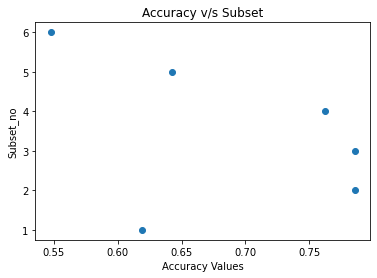

--------------------------------------------------------------

--------------------------------------------------------------

K Value :  3
Subset :  1
Accuracy :  0.7380952380952381
Subset :  2
Accuracy :  0.7857142857142857
Subset :  3
Accuracy :  0.8095238095238095
Subset :  4
Accuracy :  0.6904761904761905
Subset :  5
Accuracy :  0.5952380952380952
Subset :  6
Accuracy :  0.5952380952380952
[0.7380952380952381, 0.7857142857142857, 0.8095238095238095, 0.6904761904761905, 0.5952380952380952, 0.5952380952380952]


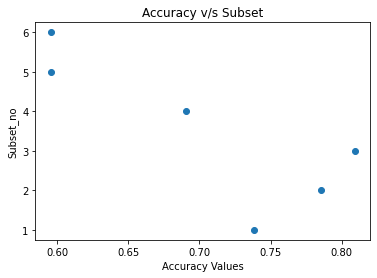

--------------------------------------------------------------

--------------------------------------------------------------

K Value :  5
Subset :  1
Accuracy :  0.8095238095238095
Subset :  2
Accuracy :  0.8095238095238095
Subset :  3
Accuracy :  0.8333333333333334
Subset :  4
Accuracy :  0.7142857142857143
Subset :  5
Accuracy :  0.6428571428571429
Subset :  6
Accuracy :  0.6190476190476191
[0.8095238095238095, 0.8095238095238095, 0.8333333333333334, 0.7142857142857143, 0.6428571428571429, 0.6190476190476191]


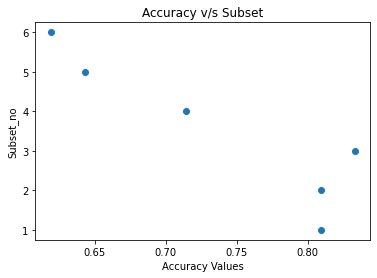

--------------------------------------------------------------

--------------------------------------------------------------

K Value :  7
Subset :  1
Accuracy :  0.8095238095238095
Subset :  2
Accuracy :  0.8095238095238095
Subset :  3
Accuracy :  0.7857142857142857
Subset :  4
Accuracy :  0.7380952380952381
Subset :  5
Accuracy :  0.5952380952380952
Subset :  6
Accuracy :  0.5952380952380952
[0.8095238095238095, 0.8095238095238095, 0.7857142857142857, 0.7380952380952381, 0.5952380952380952, 0.5952380952380952]


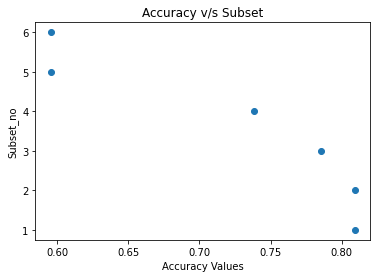

--------------------------------------------------------------



In [439]:
# for just the subset values independently 
k_list = [1,3,5,7]
split_subset_computation(k_list,subsets)

### For the third Question 
3. Divide them into 6 subsets and perform the classification on each subset. Then perform the majority voting for classification.
We have already divided into 6 subsets

In [440]:
# For polling between the 6 subsets 
# The function is defined at the top 
split_subset_sum_computation(k_list,len(subsets),subsets)

--------------------------------------------------------------

K Value :  1
The accuracy Score :  0.8333333333333334
-------------------------------------

--------------------------------------------------------------

K Value :  3
The accuracy Score :  0.8333333333333334
-------------------------------------

--------------------------------------------------------------

K Value :  5
The accuracy Score :  0.8809523809523809
-------------------------------------

--------------------------------------------------------------

K Value :  7
The accuracy Score :  0.8571428571428571
-------------------------------------



#### Moving on to the 4th Question , where we have to divide into 5 different subsets

In [441]:

# Divide the attributes into 12 attributes and 5 subsets
#All the subsets will be held in the below list 
subsets = []
start = 0 
end = 12
for i in range(5):
    #Spitting the subsets
    Input_Part = Input_X.iloc[:,start:end]
    start = end
    end = end+12
    subsets.append(Input_Part)

First Part of the 4th Question

--------------------------------------------------------------

K Value :  1
Subset :  1
Accuracy :  0.7857142857142857
Subset :  2
Accuracy :  0.8571428571428571
Subset :  3
Accuracy :  0.6904761904761905
Subset :  4
Accuracy :  0.6904761904761905
Subset :  5
Accuracy :  0.5
[0.7857142857142857, 0.8571428571428571, 0.6904761904761905, 0.6904761904761905, 0.5]


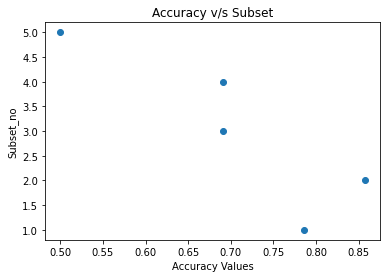

--------------------------------------------------------------

--------------------------------------------------------------

K Value :  3
Subset :  1
Accuracy :  0.8095238095238095
Subset :  2
Accuracy :  0.7857142857142857
Subset :  3
Accuracy :  0.6904761904761905
Subset :  4
Accuracy :  0.6904761904761905
Subset :  5
Accuracy :  0.6428571428571429
[0.8095238095238095, 0.7857142857142857, 0.6904761904761905, 0.6904761904761905, 0.6428571428571429]


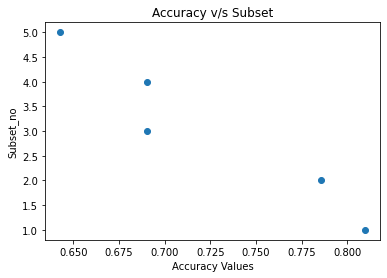

--------------------------------------------------------------

--------------------------------------------------------------

K Value :  5
Subset :  1
Accuracy :  0.7857142857142857
Subset :  2
Accuracy :  0.7619047619047619
Subset :  3
Accuracy :  0.7857142857142857
Subset :  4
Accuracy :  0.7142857142857143
Subset :  5
Accuracy :  0.6666666666666666
[0.7857142857142857, 0.7619047619047619, 0.7857142857142857, 0.7142857142857143, 0.6666666666666666]


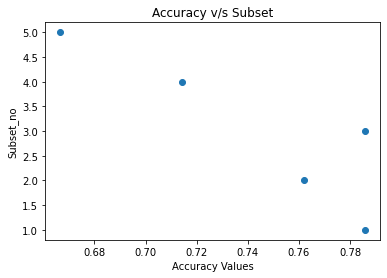

--------------------------------------------------------------

--------------------------------------------------------------

K Value :  7
Subset :  1
Accuracy :  0.8095238095238095
Subset :  2
Accuracy :  0.7380952380952381
Subset :  3
Accuracy :  0.7619047619047619
Subset :  4
Accuracy :  0.6904761904761905
Subset :  5
Accuracy :  0.7619047619047619
[0.8095238095238095, 0.7380952380952381, 0.7619047619047619, 0.6904761904761905, 0.7619047619047619]


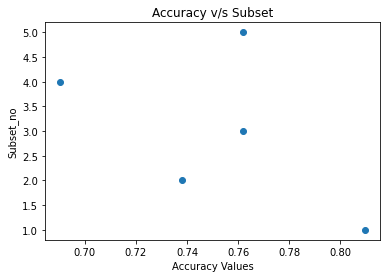

--------------------------------------------------------------



In [442]:
# for just the subset values independently 
k_list = [1,3,5,7]
split_subset_computation(k_list,subsets)

Second Part of the 4th Question 

In [443]:
# For polling between the 5 subsets 
split_subset_sum_computation(k_list,len(subsets),subsets)

--------------------------------------------------------------

K Value :  1
The accuracy Score :  0.8095238095238095
-------------------------------------

--------------------------------------------------------------

K Value :  3
The accuracy Score :  0.8571428571428571
-------------------------------------

--------------------------------------------------------------

K Value :  5
The accuracy Score :  0.9047619047619048
-------------------------------------

--------------------------------------------------------------

K Value :  7
The accuracy Score :  0.8333333333333334
-------------------------------------

